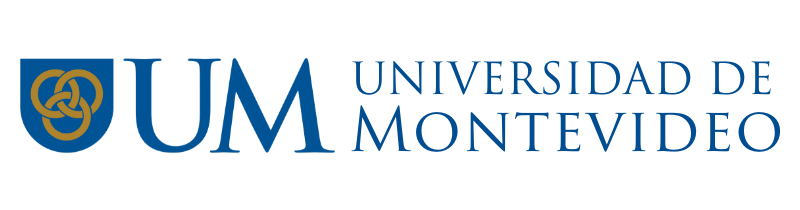

# Entrega 1
**Karen Baz, Federico Novelli**

**Aprendizaje Automatico**  

Importamos los paquetes necesarios y el dataset a analizar

In [ ]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import scipy as stast
import sklearn as skl         
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot    
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



Usamos la libreria pandas para leer el archivo csv


In [ ]:
datos = pd.read_csv("winequality-red.csv")

# Parte 1

**Exploracion del dataset**

In [ ]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Las variables con las que trabajaremos seran:

*  Fixed Acidity
*  Volatile Acidity
*  Citric Acid
*  Residual Sugar
*  Chlorides
*  Free Sulfur Dioxide
*  Total Sulfur Dioxide
*  Density
*  PH
*  Sulphates
*  Alcohol







Representación gráfica de la correlación entre variablesa traves de heatmap del paquete Seaborn

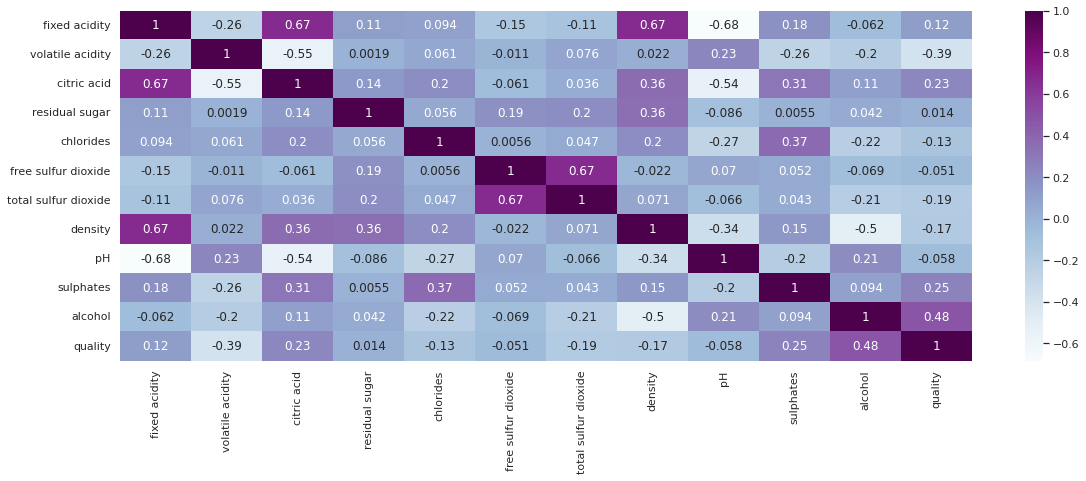

In [ ]:
plt.figure(figsize = (17,6))
sns.heatmap(datos.corr(), annot = True, cmap="BuPu")
plt.show()

No handles with labels found to put in legend.


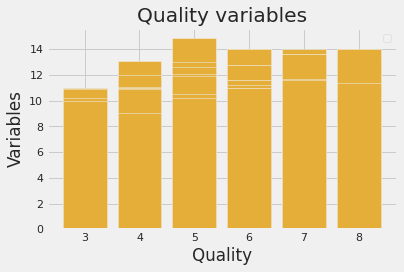

In [ ]:
plt.style.use('fivethirtyeight')
plt.title('Quality variables')
plt.xlabel('Quality')
plt.ylabel('Variables')
plt.legend()
plt.tight_layout()

plt.bar(datos['quality'], datos['alcohol'], color = "#e5ae38", label = 'alcohol')

plt.show()

In [ ]:
datos.sort_values("quality", axis=0, ascending=True, inplace=True, na_position='first')
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3


## Parte 2

**Modelo Regresion Lineal Multiple**

Utilizaremos el metodo de regresion lineal multiple para determinar la correlacion entre nuestras variables y la calidad del vino

Separamos el dataset, en dos conjuntos datos (80% para entrenar el dataset) y en test (20% para entrenar el modelo)

In [ ]:
p_train = 0.80

train = datos.iloc[:int((len(datos))*p_train)]
test = datos.iloc[int((len(datos))*p_train):]

print(train,"\n")
print(test,"\n")

Separo mi conjunto en X e Y, donde X sera el conjunto de las variables mientras que Y sera el resultado es decir la calidad del vino dado dichas variables

In [ ]:
test_X = test.iloc[:,:-1]
test_Y = test.iloc[:,-1]

train_X = train.iloc[:,:-1]
train_Y = train.iloc[:,-1]

print(train_X,"\n")
print(train_Y ,"\n")

In [ ]:
modelo = linear_model.LinearRegression().fit(train_X, train_Y)
print("Coeficientes sklearn:", modelo.intercept_, modelo.coef_)

Obtengo las predicciones de mi modelo

In [ ]:
predictions = modelo.predict(test_X)
print(predictions)

Comparo las predicciones con test_Y que son los resultados reales, para eso vamos a usar 2 metricas:
*   Error Cuadratico Medio
*   Error Absoluto Medio




**Error Cuadratico Medio**

In [ ]:
print("Error Cuadratico Medio:", mean_squared_error(test_Y, predictions))

Error Cuadratico Medio: 1.3623407291339427


**Error Absoluto Medio**

In [ ]:
print("Error Absoluto Medio:", mean_absolute_error(test_Y, predictions))

Error Absoluto Medio: 1.0578280847804975


# Parte 3


La variable de calidad debe de convertirse a una clase
de 2 valores: bueno y malo. 
Por lo que tenemos que definir el umbral de corte para determinar esta clase, partiendo de las categorías definidas en el dataset.

Para ello lo primero que haremos es ver como estan distribuidos nuestros datos de quality, y de acuerdo a la distribucion de los mismo definiremos el umbral.


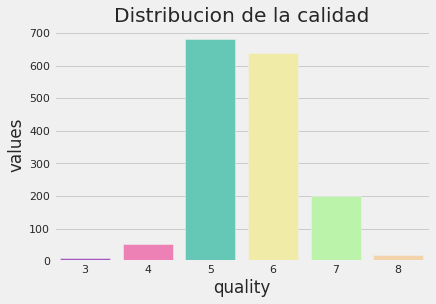

In [ ]:
plt.figure()
mycolors = ["#AB46D2", "#FF6FB5", "#55D8C1", "#FCF69C", "#B4FF9F", "#FFD59E"]
sns.countplot(data = datos, x="quality", palette = mycolors)
plt.title('Distribucion de la calidad')
plt.xlabel('quality')
plt.ylabel('values')
plt.show()

Como podemos ver los valores oscilan entre el rango [3,8] predominando entre los valores de calidad 5 y 6, por ende como la mayor parte de nuestros datos se encuentran entre esos dos valores, si los ponemos en la misma categoria nuestro modelo no tendria suficientes valores de la categoria contraria, por ende vamos a definir la siguiente categoria:

*   Quality >= 6 Bueno
*   Quality < 6 Malo



In [ ]:
for index in range(len(datos)):
  if datos["quality"][index] < 6:
    datos["quality"][index] = 0
  else:
    datos["quality"][index] = 1


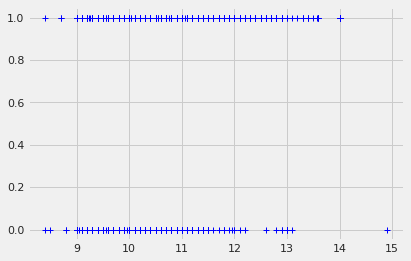

In [ ]:
from matplotlib import pyplot as plt

plt.plot(datos['alcohol'], datos['quality'], '+', color = 'blue')

plt.show()

Una vez definido el umbral comenzaremos a aplicar algunos modelos para posteriormente compararlos entre si.
Los modelos que aplicaremos son:
1.   Regresion Logistica
2.   Naive Bayes



**Regresion Logistica**

Creo un grupo de entrenamiento y de testeo con una porporcion para cada grupo de 80-20, respectivamente.

Realizamos análisis de regresión para la variable independiente 'alcohol' ya que es la que muestra la mayor correlación con la variable dependiente 'quality'.

Mediante este estudio prodemos ver si hay una relación definida entre variables para crear un modelo predictivo. En este caso probaremos con una regresión lineal.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datos[['alcohol']], datos[['quality']], test_size = 0.2)

In [ ]:
model = LogisticRegression()

Realizamos el modelo y hacemos que prediga los valores para el grupo de testeo y devolvemos la accuracy del modelo:

In [ ]:
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.64375

In [ ]:
model.predict_proba(x_test)

Creamos una matriz de confusión para visualizar los resultados del modelo y compararlos con los resultados que debería de haber dado bajo una predicción perfeceta.

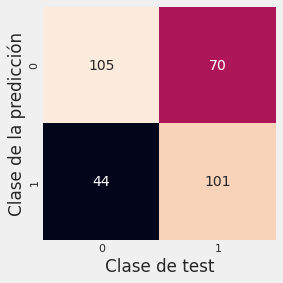

In [ ]:
y_predict = model.predict(x_test)
y_predict_proba = model.predict_proba(x_test)
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

En base a la matriz de confusión, obtenemos las siguientes medidas de desempeño del modelo:

Accuracy = (276+6)/(276+33+5+6) = 0,881

Sensitivity = (276)/(276+5) = 0,982

Specificity = (6)/(6+33) = 0,154

Calculamos las curvas de ROC y AUC:

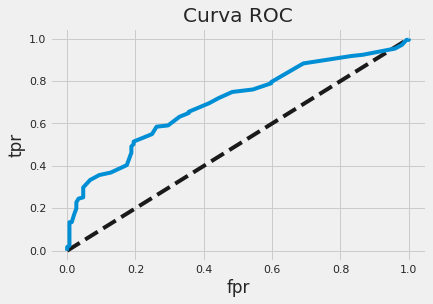

0.697515601083245


In [ ]:
probas = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC')
plt.show()

print(roc_auc_score(y_test, probas[:, 1]))

Calculamos indicadores de desempeño del modelo:

In [ ]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       149
           1       0.70      0.59      0.64       171

    accuracy                           0.64       320
   macro avg       0.65      0.65      0.64       320
weighted avg       0.65      0.64      0.64       320



**Naive Bayes**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datos[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']], datos[['quality']], test_size=0.2, random_state=27)
model2 = GaussianNB()

Aplicamos la prediccion para el modelo y podemos calcular utilizando el método predict_proba

In [ ]:
model2.fit(x_train, y_train)

In [ ]:
model2.predict(x_test)
model2.score(x_test, y_test)

1.0

In [ ]:
model2.predict_proba(x_test)

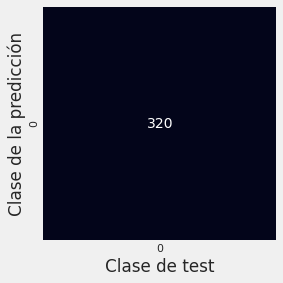

In [ ]:
y_predict = model2.predict(x_test)
y_predict_proba = model2.predict_proba(x_test)
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

In [ ]:
probas = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC')
plt.show()

print(roc_auc_score(y_test, probas[:, 1]))

AttributeError: ignored

In [ ]:
print (classification_report(y_test,y_predict))

# Parte 4

**Algoritmo K-NN (k-nearest neighbors)**

*Explicaciòn:*

El algoritmo K-nearest neighbors (kNN) es un algoritmo de Machine Learning que pertenece a los algoritmos de aprendizaje supervisado que puede ser utilizado para resolver problemas de clasificación y de regresión.
Es un algoritmo supervisado y basado en instancias.
Supervisado quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dado un conjunto de datos.
Basado en Instancia quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como base de conocimiento para la fase de predicción.

Consiste en 4 etapas:

1. Selecciona el número de K vecinos
2. Toma los K vecinos más cercanos al nuevo elemento de acuerdo con la distancia euclidiana
3. Entre los K vecinos, contar el número de elementos que pertenece a cada categoría
4. Asignar el nuevo elemento a la categoría donde se contaron más vecinos


*Aplicaciòn a nuestro caso:*



In [ ]:
modelKNN= KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(train_X, train_Y)
print(modelKNN.predict(test_X))

# Parte 5

Por medio del estudio realizado concluímos que muy pocas variables tienen una correlación directa con la calidad del vino. Es posible que exista un patrón de combinaciones de elementos y características químicas del vino que determinen su calidad. Para evaluar dicha existencia, habría que hacer un estudio más exahustivo considerando todas las combinaciones de variables posibles.

Se ha encontrado una correlación directa significativa entre el contenido de alcohol y la calidad del vino. Esta relación es creciente. El modelo generado tiene un 88% de las predicciones correctas.

Mediante el estudio del modelo de regresión logarístima, podemos concluír los siguiente al analizar la sensitividad y especificidad. Teniendo una sensitividad alta, podemos decir que la gran mayoría de los estudios de vinos que devuelvan un gran contenido etílico, serán vinos de alta calidad. Por ende, el grado de alcohol puede identificar un 98% de los vinos de buena calidad. Por otro lado, con una especificidad baja, podemos decir que el hecho de que un vino de bajo en grado alcohólico no implica que sea un vino de baja calidad. Solo un 15% de los vinos de baja calidad serán bien identificados según su grado de alcohol.